# Compare autoarima from Skforecast, pmdarima and statsforecast

In [16]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
path = str(Path.cwd().parent)
print(path)
sys.path.insert(1, path)
import skforecast

print(skforecast.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/joaquin/Documents/GitHub/skforecast
0.20.0


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from skforecast.stats import Arima
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
from skforecast.datasets import fetch_dataset
from skforecast.plot import set_dark_theme
import warnings
import timeit

╭──────────────────────────────── fuel_consumption ────────────────────────────────╮
│ Description:                                                                     │
│ Monthly fuel consumption in Spain from 1969-01-01 to 2022-08-01.                 │
│                                                                                  │
│ Source:                                                                          │
│ Obtained from Corporación de Reservas Estratégicas de Productos Petrolíferos and │
│ Corporación de Derecho Público tutelada por el Ministerio para la Transición     │
│ Ecológica y el Reto Demográfico. https://www.cores.es/es/estadisticas            │
│                                                                                  │
│ URL:                                                                             │
│ https://raw.githubusercontent.com/skforecast/skforecast-                         │
│ datasets/main/data/consumos-combustibles-mensual.csv                             │
│                                                                                  │
│ Shape: 644 rows x 6 columns                                                      │
╰──────────────────────────────────────────────────────────────────────────────────╯

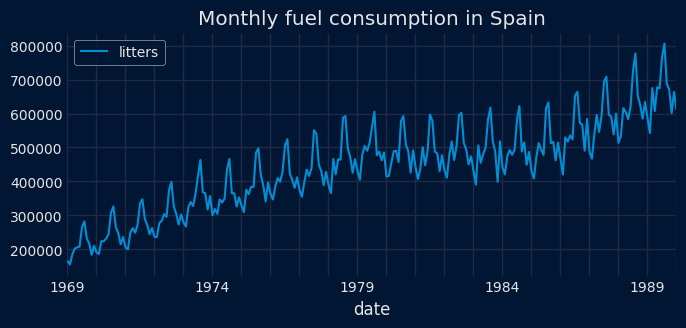

In [18]:
data = fetch_dataset(name='fuel_consumption', raw=True)
data = data[['Fecha', 'Gasolinas']]
data = data.rename(columns={'Fecha':'date', 'Gasolinas':'litters'})
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')
data = data.loc[:'1990-01-01 00:00:00']
data = data.asfreq('MS')
data = data['litters']
# Plot
# ======================================================================================
fig, ax = plt.subplots(figsize=(7, 3))
set_dark_theme()
data.plot(ax=ax)
ax.set_title('Monthly fuel consumption in Spain')
ax.legend();

## pmdarima

In [19]:
warnings.filterwarnings("ignore", message=".*force_all_finite.*", category=FutureWarning)
start = timeit.default_timer()
results_pmdarima = auto_arima(
            y                 = data,
            start_p           = 0,
            start_q           = 0,
            max_p             = 3,
            max_q             = 3,
            max_P             = 2,
            max_D             = 1,
            max_Q             = 2,
            seasonal          = True,
            test              = 'adf',
            m                 = 12,   # periodicidad de la estacionalidad
            d                 = None, # El algoritmo determina 'd'
            D                 = None, # El algoritmo determina 'D'
            trace             = True,
            error_action      = 'ignore',
            suppress_warnings = True,
            stepwise          = True
        )
end = timeit.default_timer()
time_pmdarima = end - start

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=5585.000, Time=0.50 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5659.651, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5503.446, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=5483.497, Time=0.56 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=5543.713, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=5485.158, Time=0.96 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=5484.830, Time=2.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=5507.997, Time=0.77 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=5484.222, Time=4.53 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=5587.917, Time=0.12 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=5469.858, Time=0.43 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=5530.808, Time=0.11 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=5471.444, Time=0.51 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=5471.105, Time=1.00 sec
 ARIMA(1,1,1)(1,1,0

## Skforecast AutoArima

In [20]:
start = timeit.default_timer()
results_skforecast = Arima(
            order             = None, # El algoritmo determina 'order'
            seasonal_order    = None, # El algoritmo determina 'seasonal_order'
            start_p           = 0,
            start_q           = 0,
            max_p             = 3,
            max_q             = 3,
            max_P             = 2,
            max_Q             = 2,
            max_order         = 5,
            max_d             = 2,
            max_D             = 1,
            seasonal          = True,
            test              = 'adf',
            m                 = 12,   # periodicidad de la estacionalidad
            trace             = True,
            stepwise          = True
        )
results_skforecast.fit(y=data, suppress_warnings= True)
end = timeit.default_timer()
time_skforecast = end - start


Fitting models using approximations...

 ARIMA(0,1,0)(1,1,1)[12]                    : 5552.4685
 ARIMA(0,1,0)(0,1,0)[12]                    : 5660.2884
 ARIMA(1,1,0)(1,1,0)[12]                    : 5468.8003
 ARIMA(0,1,1)(0,1,1)[12]                    : 5402.2462
 ARIMA(0,1,1)(0,1,0)[12]                    : 5491.2417
 ARIMA(0,1,1)(1,1,1)[12]                    : 5403.9700
 ARIMA(0,1,1)(0,1,2)[12]                    : 5403.6720
 ARIMA(0,1,1)(1,1,0)[12]                    : 5446.0502
 ARIMA(0,1,1)(1,1,2)[12]                    : Inf
 ARIMA(0,1,0)(0,1,1)[12]                    : 5551.4660
 ARIMA(1,1,1)(0,1,1)[12]                    : 5384.7508
 ARIMA(1,1,1)(0,1,0)[12]                    : 5472.3319
 ARIMA(1,1,1)(1,1,1)[12]                    : 5386.4871
 ARIMA(1,1,1)(0,1,2)[12]                    : 5385.8010
 ARIMA(1,1,1)(1,1,0)[12]                    : 5419.5155
 ARIMA(1,1,1)(1,1,2)[12]                    : Inf
 ARIMA(1,1,0)(0,1,1)[12]                    : 5425.2527
 ARIMA(2,1,1)(0,1,1

## Nixtla statsforecast

In [21]:
warnings.filterwarnings("ignore", message=".*force_all_finite.*", category=FutureWarning)
start = timeit.default_timer()
results_statsforecast = AutoARIMA(
    start_p=0,
    start_q=0,
    max_p=3,
    max_q=3,
    max_P=2,
    max_D=1,
    max_Q=2,
    d=None,               # choose differencing automatically
    D=None,               # choose seasonal differencing automatically
    seasonal=True,        # include seasonal part
    season_length=12,     # periodicidad de la estacionalidad
    stepwise=True,        # stepwise search
    trace=True,           # show progress
)
results_statsforecast.fit(y=data)
end = timeit.default_timer()
time_statsforecast = end - start

/home/joaquin/miniconda3/envs/skforecast_20_py13/lib/python3.13/site-packages/statsforecast/arima.py:1130: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.all(x[0] == x)



ARIMA(0,1,0)(1,1,1)[12]                   :5551.665644885963

ARIMA(0,1,0)(0,1,0)[12]                   :5659.32806947267

ARIMA(1,1,0)(1,1,0)[12]                   :5468.431481512914

ARIMA(0,1,1)(0,1,1)[12]                   :5401.8491467201175

ARIMA(0,1,1)(0,1,0)[12]                   :5490.341495005201

ARIMA(0,1,1)(1,1,1)[12]                   :5403.938283503709

ARIMA(0,1,1)(0,1,2)[12]                   :5403.577773175055

ARIMA(0,1,1)(1,1,0)[12]                   :5445.476952526394

ARIMA(0,1,1)(1,1,2)[12]                   :5402.522106320838

ARIMA(0,1,0)(0,1,1)[12]                   :5550.460447308178

ARIMA(1,1,1)(0,1,1)[12]                   :5384.637375162253

ARIMA(1,1,1)(0,1,0)[12]                   :5471.4765537859275

ARIMA(1,1,1)(1,1,1)[12]                   :5386.3754339439465

ARIMA(1,1,1)(0,1,2)[12]                   :5385.952636584897

ARIMA(1,1,1)(1,1,0)[12]                   :5419.475395818534

ARIMA(1,1,1)(1,1,2)[12]                   :5386.892394390272

ARIMA

# Results

In [22]:
# Table of times
# ==============================================================================
times_arima = pd.DataFrame({
    'fit_time_seconds': [time_pmdarima, time_skforecast, time_statsforecast],
}, index=['ARIMA pmdarima', 'ARIMA skforecast', 'ARIMA statsforecast'])
times_arima

,fit_time_seconds
ARIMA pmdarima,18.684709
ARIMA skforecast,5.521264
ARIMA statsforecast,1.874462


In [23]:
# Compare best models
print(f'pmdarima best model     : {results_pmdarima.order}, {results_pmdarima.seasonal_order}')
print(f'skforecast best model   : {results_skforecast.best_params_["order"]}, {results_skforecast.best_params_["seasonal_order"]}, {results_skforecast.best_params_["m"]}')
print(f'statsforecast best model: {results_statsforecast.model_["arma"]}')

pmdarima best model     : (1, 1, 1), (0, 1, 1, 12)
skforecast best model   : (1, 1, 1), (0, 1, 1), 12
statsforecast best model: (1, 1, 0, 1, 12, 1, 1)
